# Image Preprocessing notebook

This notebook resizes the training images to the correct size and places the images i a new folder.
Resizing test images is performed in the same way.

In [9]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.transform import resize

import data_utils
import os

import sys
sys.path.append(os.path.join('.', '..')) # Allow us to import shared custom 
                                         # libraries, like utils.py

## Loading the data

In [10]:
# reading the train csv file
train = pd.read_csv('dataset/train.csv')

# linking the images(input) to the target given in the CSV train file.
train_images = ['dataset/root/train/cropped/{}.png'.format(i) for i in train.ID.values]
print("Total observations:\t", len(train_images))


Total observations:	 11617


### Displaying cropped image example

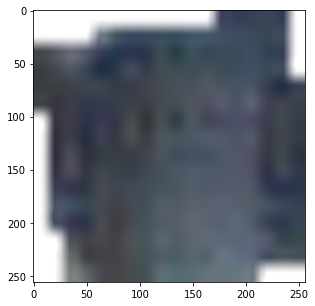

In [4]:
# the image sample to display
imageSample = 0
fig = plt.figure(figsize=(5, 5))
image = imread(train_images[imageSample])
plt.imshow(image, cmap='gray')
plt.show()

## Resizing the images to fit ResNet50 demanded input

Resizing image: 0 of 11617
Resizing image: 1000 of 11617
Resizing image: 2000 of 11617
Resizing image: 3000 of 11617
Resizing image: 4000 of 11617
Resizing image: 5000 of 11617
Resizing image: 6000 of 11617
Resizing image: 7000 of 11617
Resizing image: 8000 of 11617
Resizing image: 9000 of 11617
Resizing image: 10000 of 11617
Resizing image: 11000 of 11617


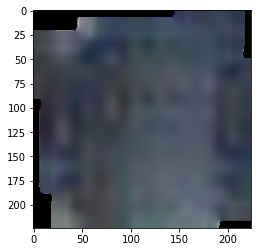

In [5]:
from PIL import Image
import imageio

# Resizing images
height = 224
width = 224
image_size = (height, width)

for i, images in enumerate(train_images):
    image = imread(images)
    image = image[:,:,:3] # remove the 4'th mask channel
    image = data_utils.pad2square(image)  # Make the image square
    image = resize(image, output_shape=image_size, mode='reflect' , anti_aliasing=True)  # resizes the image
    image = 255*image # assemble new image (uint8: 0-255)
    image = image.astype(np.uint8)
    imageio.imwrite('dataset/root/train/resized/{}.png'.format(train.ID.values[i]), image) # saves image
     #dataset/root/train/cropped/{}.png'.format(i) for i in train.ID.values
    # appending to list
    #train_images[i] = image
    
    
    if i % 1000 == 0:
        print("Resizing image:", i, "of", len(train_images))

# displaying the same image example
plt.imshow(train_images[imageSample], cmap='gray')
plt.show()

In [6]:
# displaying the target for the specific imagesample
# in this way we also check that images and output are linked correctly
train[imageSample:imageSample+1].T

,0
ID,16490_15036
tag_id,15036
image_id,16490
p1_x,3988.4
p_1y,1227.59
p2_x,3986.71
p2_y,1213.29
p3_x,4002.6
p3_y,1211.41
p4_x,4004.29
